# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

data_info = data.info()
data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
print(data_info)
display(data.head())
display(data_description)

None


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Изучив общую информацию о значениях, находящихся в таблице, можно сделать следующие выводы:
    
    1) у многих стобцов указан неверный тип данных;
    2) пропущено много значений, однако не везде можно предположить логичное и справедливое заполнение этих пропусков;
    3) распределение значений некоторых переменных нормальное (например, цены, количества комнат, количества балконов и др.), так как среднее соразмерно медиане;
    4) вышеизложенные умозаключения нуждаются в проверке и корректировке в силу огромного количества пропусков.

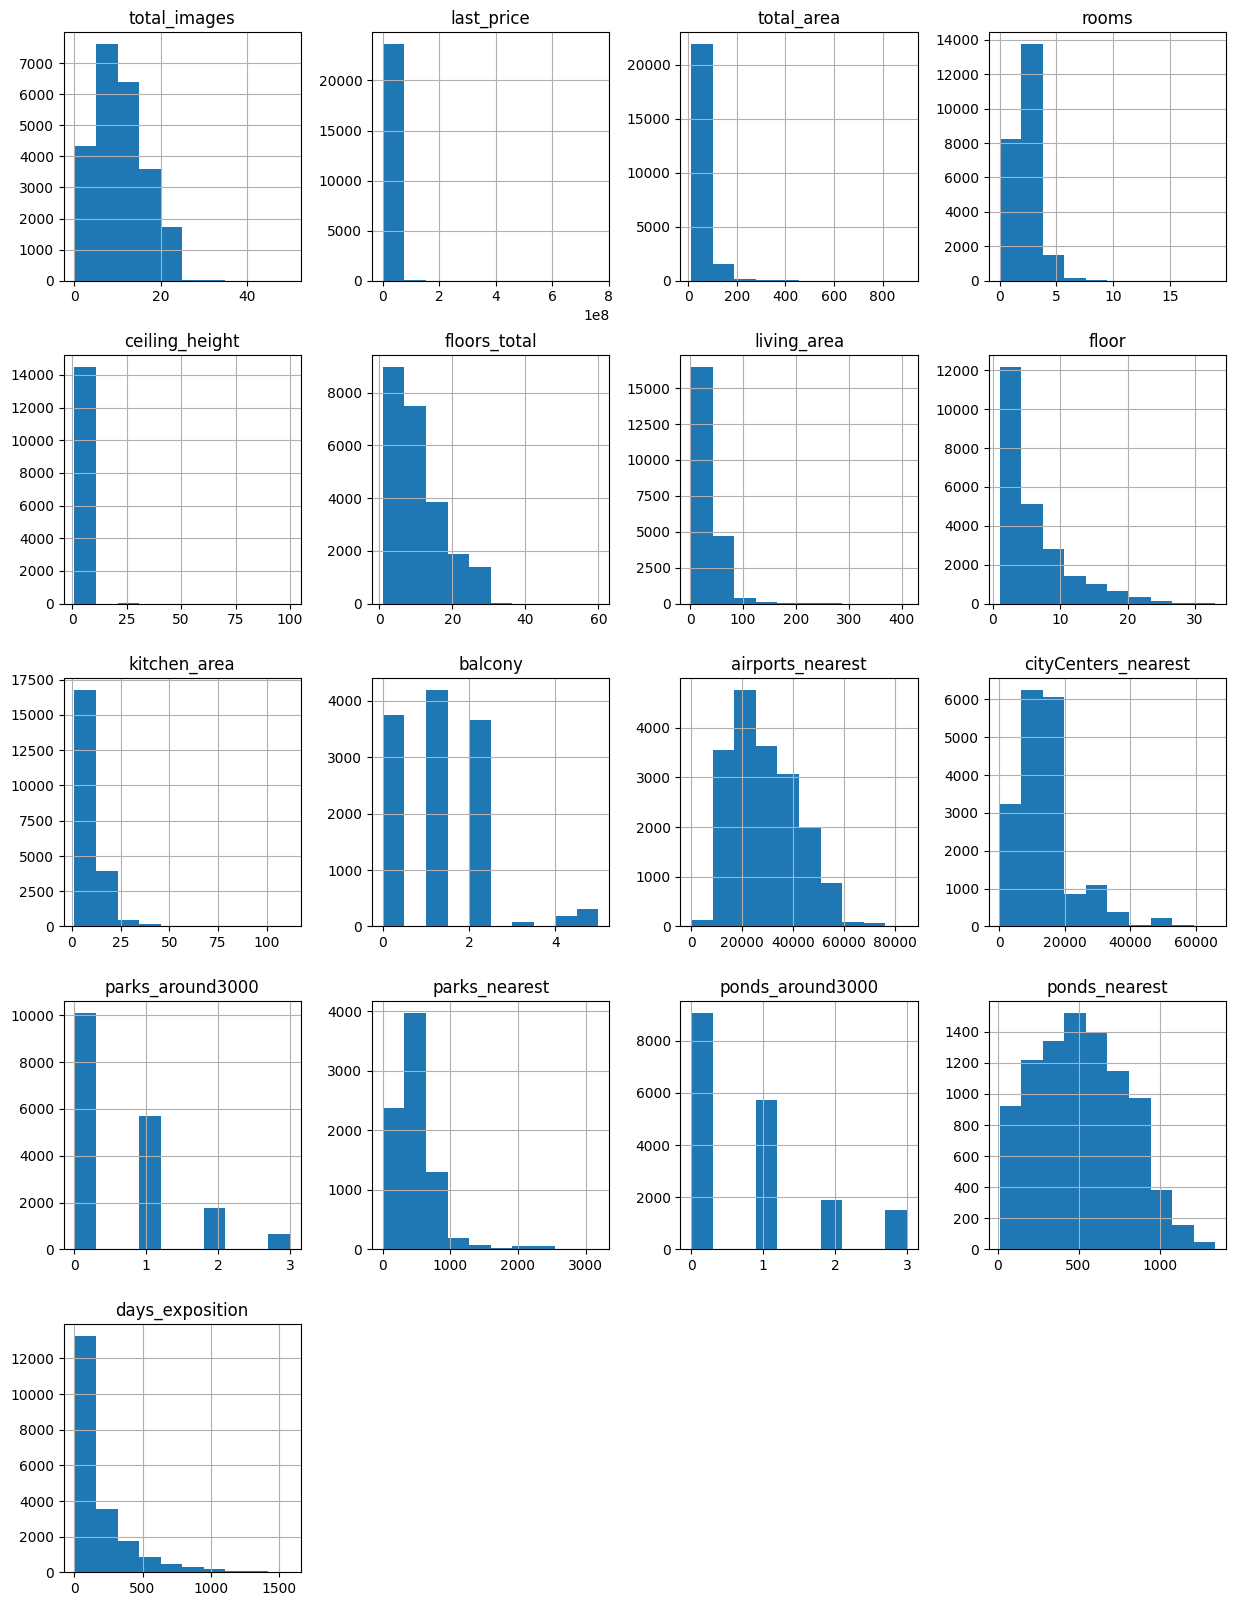

In [7]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
median_ceiling_height = data['ceiling_height'].median #заменим на медианное значение, так как высота потолков везде примерно одинаковая
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)

In [10]:
#посчитаем пропущенные значения жилой площади через средний коэффициент ее отношения к общей площади
data['living_area_ratio'] = data['living_area'] / data['total_area']
mean_living_area_ratio = data['living_area_ratio'].mean()
data['living_area'].fillna(data['total_area'] * mean_living_area_ratio, inplace=True)
data.drop('living_area_ratio', axis=1, inplace=True) #удалим столбец


In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False) #если не указали, значит нет

In [12]:
#посчитаем пропущенные значения площади кухни через средний коэффициент ее отношения к общей площади
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
mean_kitchen_area_ratio = data['kitchen_area_ratio'].mean()
data['kitchen_area'].fillna(data['total_area'] * mean_kitchen_area_ratio, inplace=True)
data.drop('kitchen_area_ratio', axis=1, inplace=True) #удалим столбец

In [13]:
data['balcony'] = data['balcony'].fillna(0) #если не указали, значит значение равно нулю

In [14]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) #если не указали, значит значение равно нулю

In [15]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) #если не указали, значит значение равно нулю

airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - картографические признаки с расстояниями, в связи с чем на данном этапе нельзя заполнить пропуски, так как еще не обработаны названия населенных пунктов, которые могут включать в себя различного рода дубликаты.

В столбцах days_exposition и floors_total замену предположить нельзя, так как значения в столбцах не связаны со значениями в других столбцах и могут быть пропущены по множеству причин.

Возможные причины пропусков:
1. Отсутствие системы заполнения таблицы: кто-то при остутствии балконов ставит ноль, а кто-то пропускает ячейку (аналогично с другими столбцами с подобным типом значений);
2. Отсутствие данных;
3. Ошибка со стороны системы;
4. Человеческий фактор: кто-то мог по невнимательности или по каким-либо другим причинам не внести данные в таблицу

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['living_area'] = pd.to_numeric(data['living_area'], errors='coerce')
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors='coerce')
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'], errors='coerce')
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], errors='coerce')
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], errors='coerce')
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], errors='coerce')
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], errors='coerce')
data['floor'] = data['floor'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  float64       
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Типы столбцов нужно заменить потому, что при вызове метода .info() информация, содержащаяся в таблице, станет более очевидной. Также это необходимо сделать, чтобы при последующих расчетах могли выполняться те операции, которые мы хотим провести над значениями.

In [17]:
#data['locality_name'].unique()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('городской поселок', 'поселок городского типа', regex=True)
    .replace('поселок станции', 'поселок при железнодорожной станции', regex=True)
)

data['locality_name'] = (
    data['locality_name']
    .str.replace('поселок Мурино', 'Мурино')
)

data['locality_name'] = (
    data['locality_name']
    .str.replace('деревня Кудрово', 'Кудрово')
)

data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'поселок городского типа Красный Бор',
       'Гатчина', 'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы

В данном случае дубликатами являются те названия, в которых есть буквы "ё" или "ё", содержат в своем имени "городской поселок" (=поселок городского типа) или "поселок станции" (=поселок при железнодорожной станции). Также обработаны устаревшие данные: Кудрово и Мурино теперь города, а не деревня и поселок.

### Посчитайте и добавьте в таблицу новые столбцы

In [18]:
data['price_per_meter']=(data['last_price']/data['total_area']).round(2)

In [19]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [20]:
data['month'] = data['first_day_exposition'].dt.month

In [21]:
data['year'] = data['first_day_exposition'].dt.year

In [22]:
def categorize_flat(data):
    floor = data['floor']
    
    if floor == 1.0:
        return 'первый'
    elif floor == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['type_of_a_flat'] = data.apply(categorize_flat, axis=1)

In [23]:
data['cityCenters_in_kms'] = (data['cityCenters_nearest']/1000).round()

In [24]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,type_of_a_flat,cityCenters_in_kms
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8.0,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1.0,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4.0,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,89.797718,9.0,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13.0,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Созданы новые столбцы:

    1) цена квадратного метра, округленная до 2 знаков после запятой;
    2) день публикации объявления;
    3) месяц публикации объявления;
    4) год публикации объявления;
    5) тип этажа: 1, последний или другой;
    6) расстояние до центра населенного пункта, округленное до ближайшего целого числа;
Действие проверено вызовом метода .info()

### Проведите исследовательский анализ данных

<Axes: >

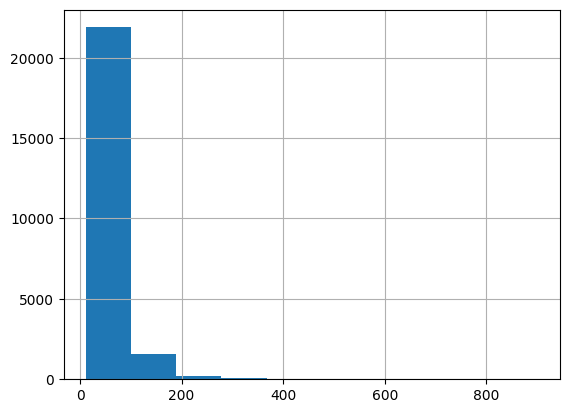

In [25]:
data['total_area'].hist()

<Axes: >

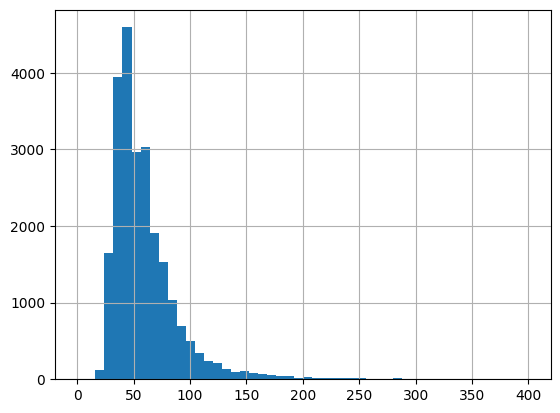

In [26]:
data['total_area'].hist(bins=50, range=(0, 400))

<Axes: >

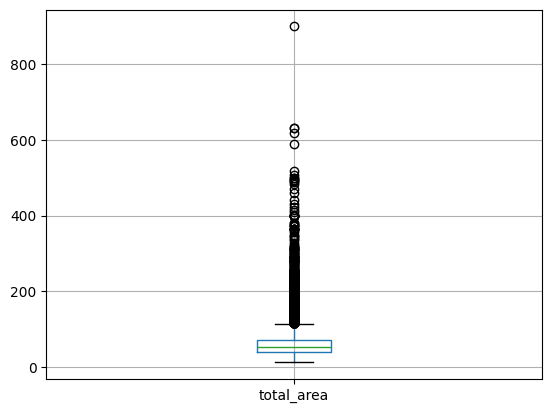

In [27]:
data.boxplot('total_area')

In [28]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<Axes: >

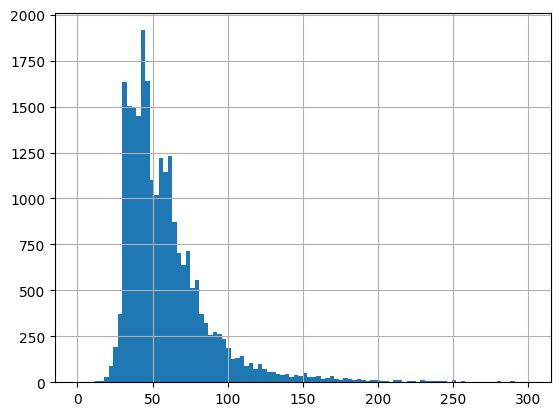

In [29]:
data['total_area'].hist(bins=100, range=(0, 300))

В гистограмме установлен максимальный диапазон значений - 300 квадратных метров, так как данные предоставлены по квартирам, а их площадь редко превышает данные значение (определено из личного опыта человека, интересующегося рынком жилья). На полученной гистограмме можно увидеть, что распространенная площадь квартир находится в районе 40-50, а также в диапазоне 60-70 квадратных метров.

<Axes: >

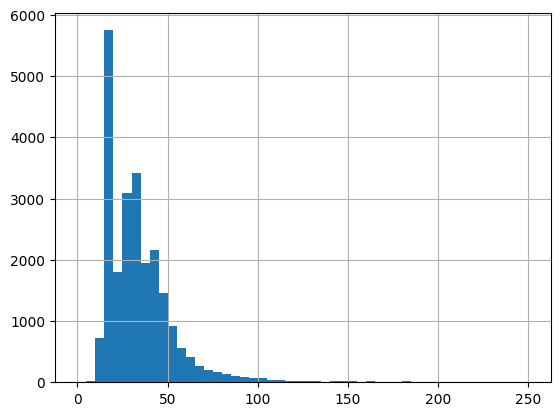

In [30]:
data['living_area'].hist(bins=50, range=(0, 250))

В гистограмме установлен максимальный диапазон значений - 250 квадратных метров, так как неизвестно, каким образом распределяется жилая и нежилая площадь в квартирах; это значение было определно исходя из минимальных значений нежилой площади максимальной площади квартиры, установленной выше (300 квадратных метров). На полученной гистограмме можно увидеть, что распространенная жилая площадь квартир находится в районе 25-30, а также в диапазоне 35-40 квадратных метров.

<Axes: >

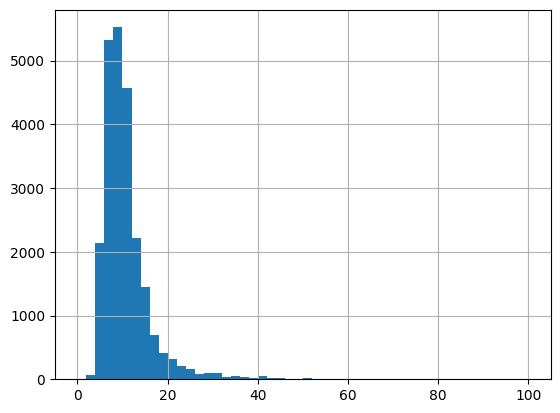

In [31]:
data['kitchen_area'].hist(bins=50, range=(0, 100))

В гистограмме установлен максимальный диапазон значений - 100 квадратных метров, так как неизвестно, каким образом площадь кухни относится к общей площади, из-за чего предположена логически допустимая верхняя граница. На полученной гистограмме можно увидеть, что распространенная площадь кухни в квартирах находится в районе 10-15 квадратных метров.

<Axes: >

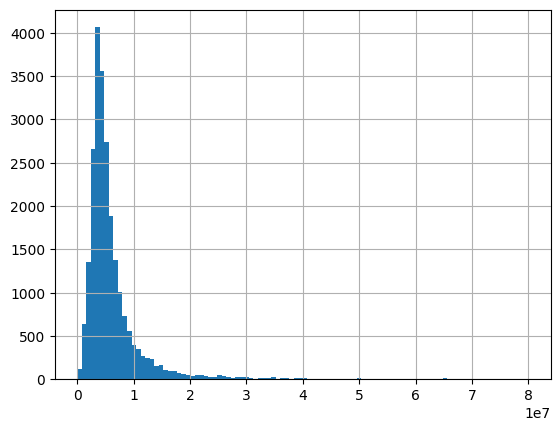

In [32]:
data['last_price'].hist(bins=100, range=(0, 80000000))

В гистограмме установлен максимальный диапазон значений - 80 миллионов, так как данные предоставлены по квартирам, а их стоимость в среднем редко превышает данные значение (определено из личного опыта человека, интересующегося рынком жилья). На полученной гистограмме можно увидеть, что самая распространенная стоимость квартир находится в диапазоне от 4,5 до 6 миллионов рублей.

<Axes: >

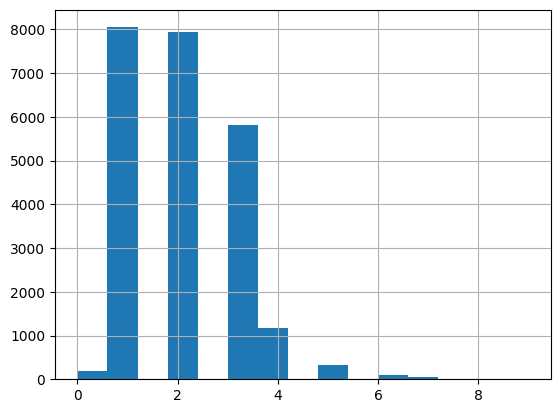

In [33]:
data['rooms'].hist(bins=15, range=(0, 9))

В гистограмме установлен максимальный диапазон значений - 9 комнат, так как данные предоставлены по квартирам; верхняя граница определена из позиции "логически допустимо". На полученной гистограмме можно увидеть, что самая распространенная комнатность квартир: 1 и 2х. 

<Axes: >

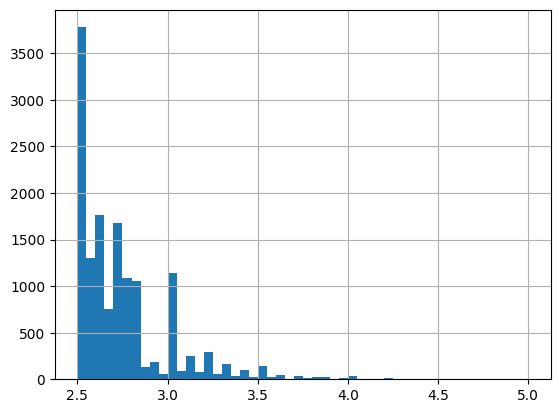

In [34]:
data['ceiling_height'].hist(bins=50, range=(2.5, 5))

В гистограмме установлен максимальный диапазон значений - 5 метров, так как данные предоставлены по квартирам; верхняя граница определена из позиции "логически допустимо" и из позиции собственных знаний. На полученной гистограмме можно увидеть, что самая распространенная высотность потолков в квартирах - 2.5 м, также популизированы потолки таких высот, как 2.7, 2.8 и 3 метра.

<Axes: >

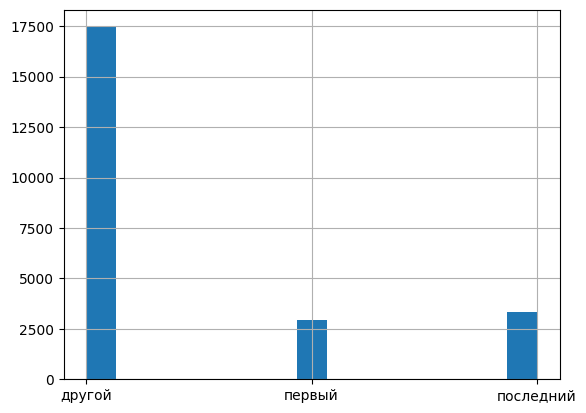

In [35]:
data['type_of_a_flat'].hist(bins=15)

На полученной гистограмме можно увидеть, что самая преимущественно квартиры продаются не на первом и не на последнем этажах. Если сравнивать первый и последний этаж, то объявлений о продаже квартир на последних этажах немного больше, чем о продаже на первых.

<Axes: >

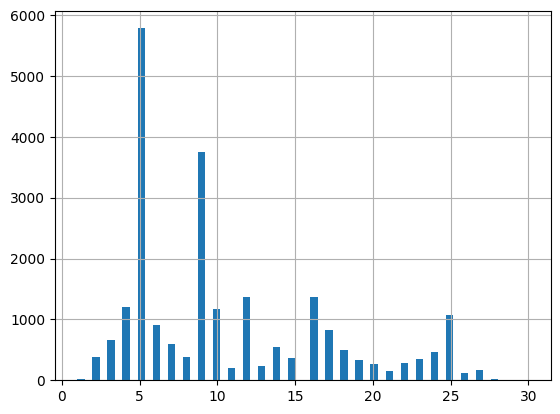

In [36]:
data['floors_total'].hist(bins=60, range=(1, 30))

На полученной гистограмме можно увидеть, что самая преимущественно квартиры в пятиэтажных и девятиэтажных домах. также нередки объявления о продаже квартир в домах с высотностью в 12, 17 и 24-25 этажей.

<Axes: >

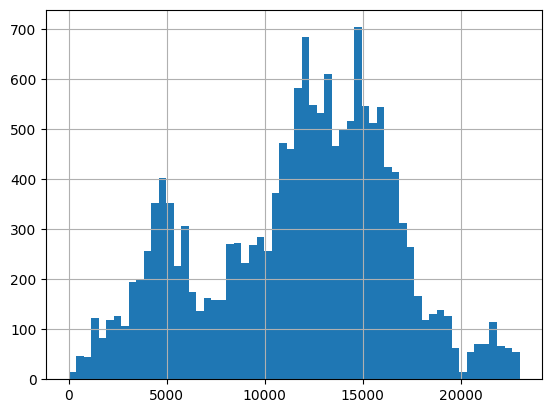

In [37]:
data['cityCenters_nearest'].hist(bins=60, range=(0, 23000))

Максимальное значение диапазона определено логическим образом: по картам рассчитано расстояние от центра Санкт-Петербурга до таких населеных пунктов, как Кудрово и Мурино, и к ним прибавлен еще 1 км (1000 м) как погрешность на дорожные развилки. На полученной диаграмме можно увидеть, что самое распространенное местоположение квартир, выставленных на продажу, находится в чуть менее 15 км от центра населенного пункта. 

<Axes: >

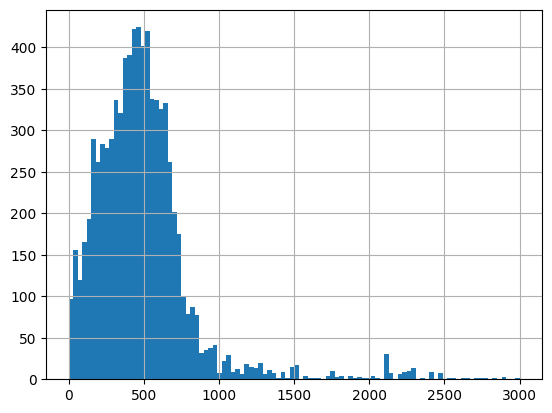

In [38]:
data['parks_nearest'].hist(bins=100, range=(0, 3000))

Максимальное значение диапазона определено логическим образом: парк, находящийся дальше, чем 3 км от дома, не может считаться ближайшим... Гистограмма подтверждает этот ход мыслей: наиболее часто ближайший парк от продаваемой недвижимости находится в районе 350-550 метров.

180.88863436982163
95.0


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

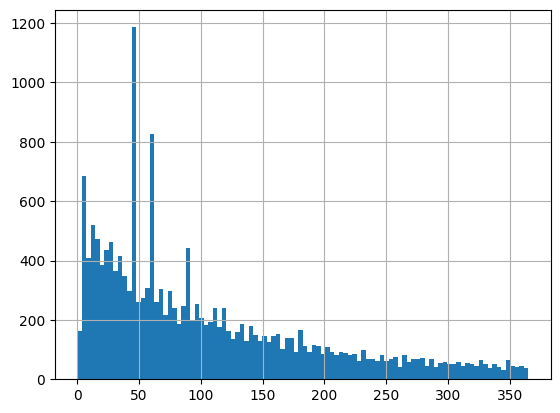

In [39]:
data['days_exposition'].hist(bins=100, range=(0, 365))

days_mean = data['days_exposition'].mean()
days_median = data['days_exposition'].median()
print(days_mean)
print(days_median)
data['days_exposition'].describe()

В среднем продажа занимает 181 день, однако среднее, как статистическая величина, уж слишком неуcтойчива к выбросам и в своем вычислении задействует уникально долгие продажи. Такого нельзя сказать о медиане, которая равна 95 дням: это означает, что половина всех квартир была продана либо в течение этого времени, либо после него. На мой взгляд, необычайно быстрыми являются продажи, находящиеся в пределах первого квантиля, то есть в пределах 45 дней. Пользуясь такой же логикой, определим, что необычайно долгие продаже - те, которые превышают значения третьего квантиля, то есть 232 дня.

In [40]:
import seaborn as sns

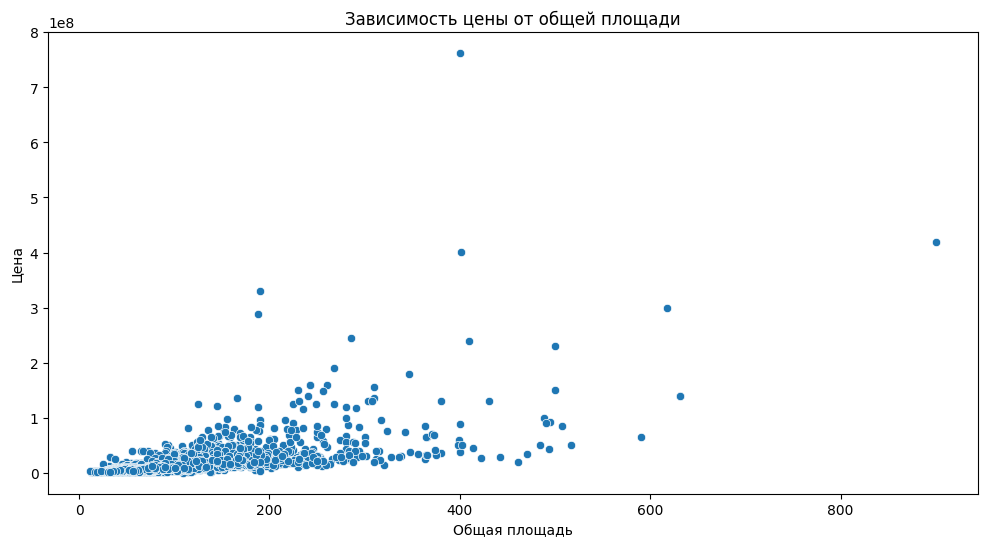

Коэффициент корреляции между ценой и общей площадью: 0.65


In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['total_area'], y=data['last_price'])
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

correlation_total_area = data['total_area'].corr(data['last_price'])
print(f"Коэффициент корреляции между ценой и общей площадью: {correlation_total_area:.2f}")


Средняя цена в зависимости от общей площади имеет тенденцию расти с увеличением общей площади, однако наблюдаются аномалии. Коэффициент корреляции 0.65, что говорит о том, что зависимость проявляется выше среднего, однако не максимально сильно.

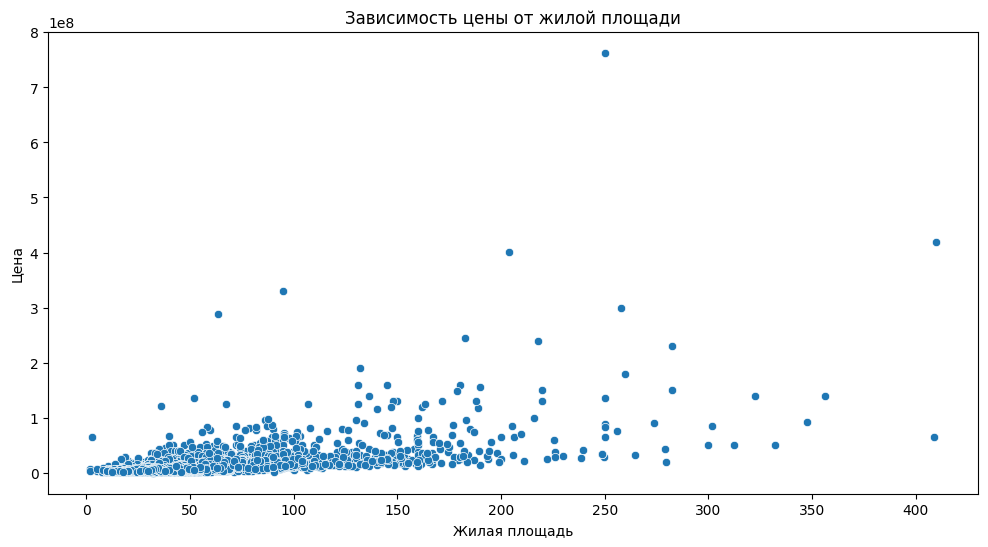

Коэффициент корреляции между ценой и жилой площадью: 0.59


In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['living_area'], y=data['last_price'])
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

correlation_living_area = data['living_area'].corr(data['last_price'])
print(f"Коэффициент корреляции между ценой и жилой площадью: {correlation_living_area:.2f}")


Средняя цена в зависимости от жилой площади имеет тенденцию расти с увеличением жилой площади, однако наблюдаются артефакты. Коэффициент корреляции 0.59, что говорит о том, что зависимость проявляется выше среднего, однако не максимально сильно.

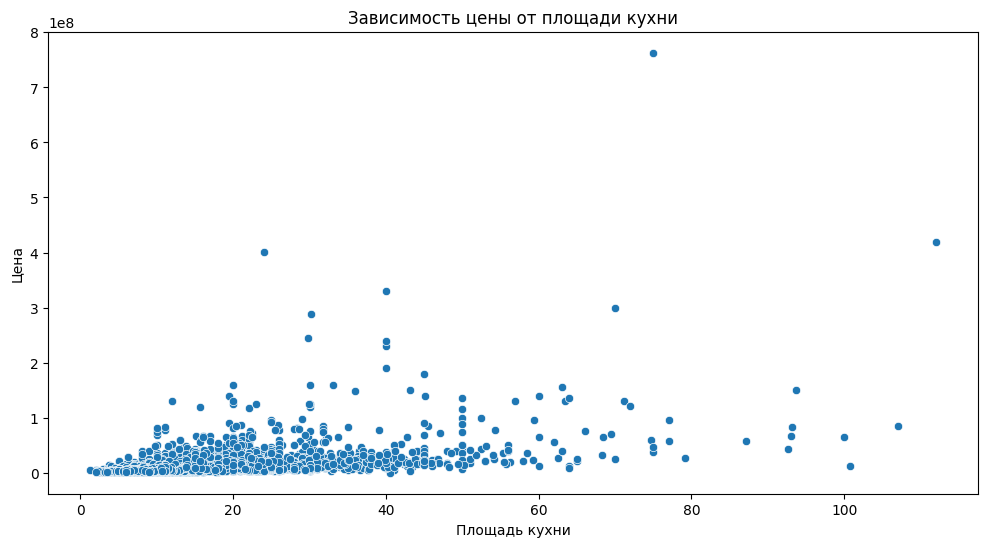

Коэффициент корреляции между ценой и площадью кухни: 0.52


In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['kitchen_area'], y=data['last_price'])
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

correlation_kitchen_area = data['kitchen_area'].corr(data['last_price'])
print(f"Коэффициент корреляции между ценой и площадью кухни: {correlation_kitchen_area:.2f}")

Коэффициент корреляции 0.52, что говорит о том, что зависимость проявляется совсем чуть-чуть выше среднего. Из диаграммы рассеяния видно, что цена квартир с разными площадями кухонь практически не отличается.

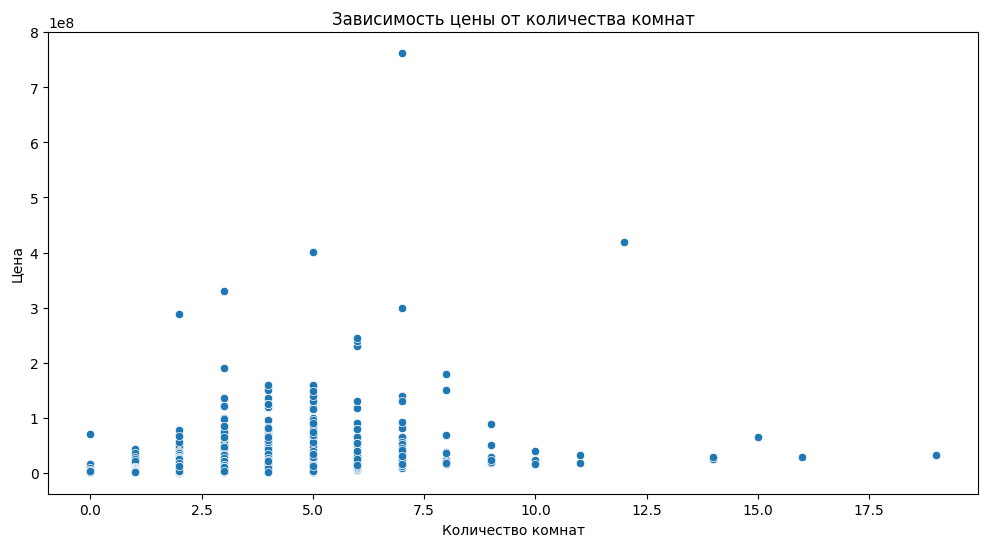

Коэффициент корреляции между ценой и количеством комнат: 0.36


In [44]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['rooms'], y=data['last_price'])
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

correlation_rooms = data['rooms'].corr(data['last_price'])
print(f"Коэффициент корреляции между ценой и количеством комнат: {correlation_rooms:.2f}")

Коэффициент корреляции между ценой и количеством комнат равен 0.36, что говорит о том, что прямо пропорциональная зависимость между ценой квартиры и количеством комнат в ней наблюдается, однако выражена несильно. Из диаграммы рассеяния видно, что до определенного количества комнат в квартире (5) цена на нее растет, однако потом наблюдается спад с последующим ростом цены на моменте 15 квартир. 

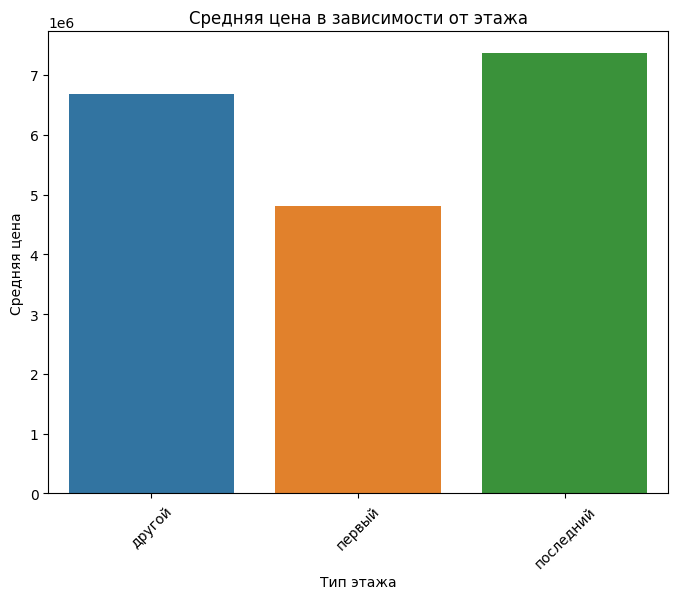

In [45]:
type_of_a_flat_price_mean = data.groupby('type_of_a_flat')['last_price'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=type_of_a_flat_price_mean.index, y=type_of_a_flat_price_mean.values)
plt.title('Средняя цена в зависимости от этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.show()

Средняя цена в зависимости от этажа, на котором расположена квартира, показывает, что наиболее дорогие квартиры находятся на последнем этаже, самые дешевые - на первом.

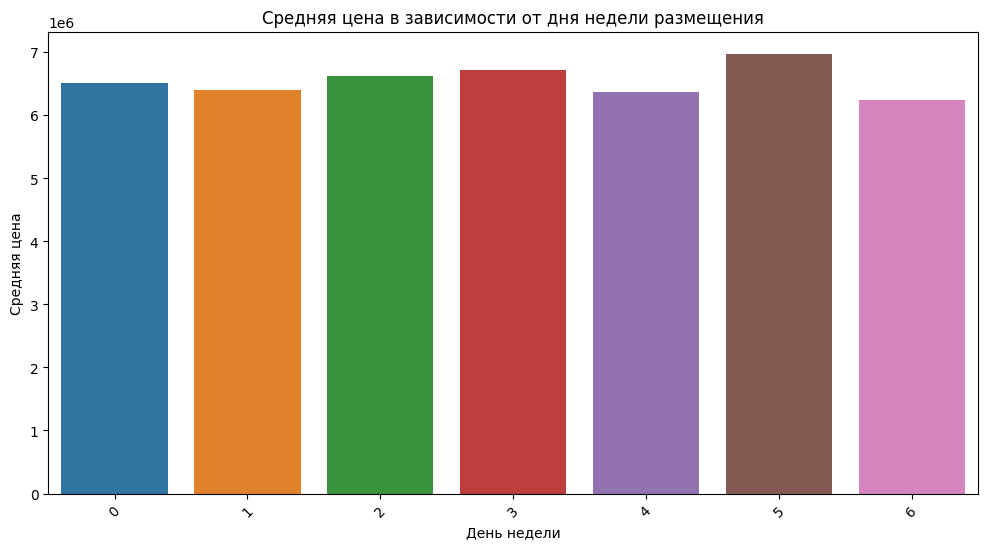

In [46]:
weekday_price_mean = data.groupby('weekday')['last_price'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_price_mean.index, y=weekday_price_mean.values)
plt.title('Средняя цена в зависимости от дня недели размещения')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.show()

Средняя цена в зависимости ото дня публикации объявления примерно одинакова для каждого дня, однако объявления, выложенные в субботу, имеют более высокий ценник относительно объявлений, опубликованных в другие дни.

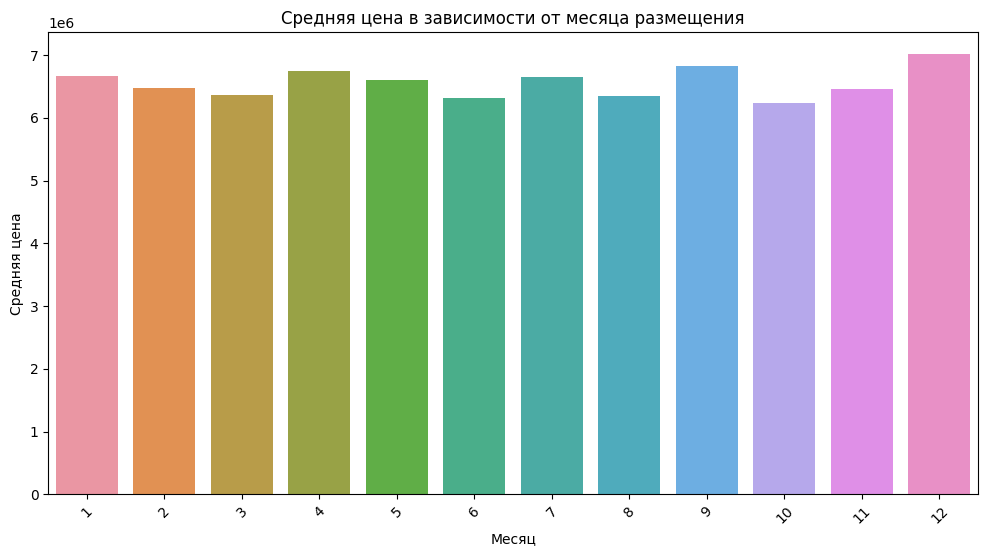

In [47]:
month_price_mean = data.groupby('month')['last_price'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=month_price_mean.index, y=month_price_mean.values)
plt.title('Средняя цена в зависимости от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.show()

Средняя цена в зависимости от месяца публикации объявления несильно отличается друг от друга, тем не менее можно заметить, что самые высокие цены указаны в объявлениях, опубликованных в декабре, а самые низкие - в октябре.

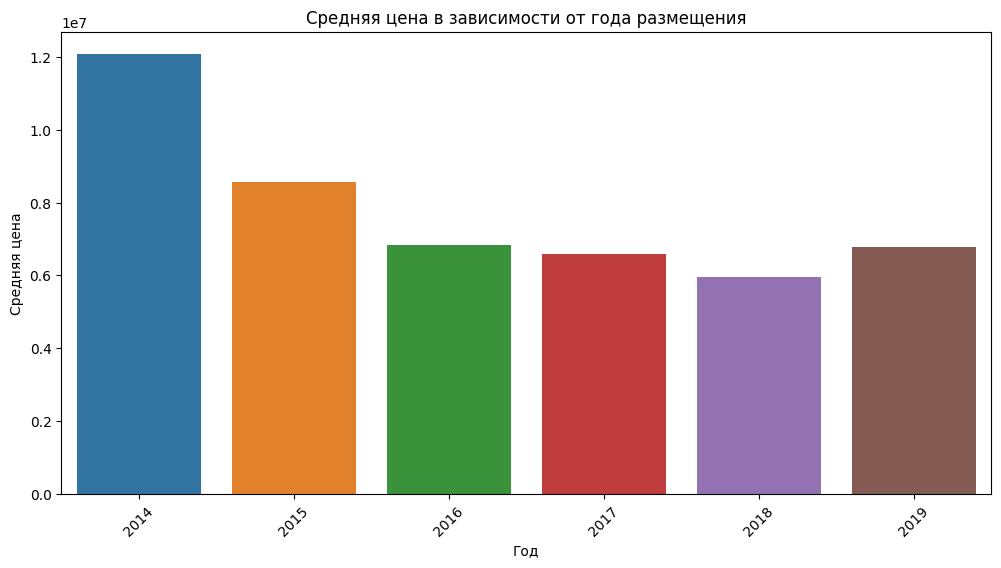

In [48]:
year_price_mean = data.groupby('year')['last_price'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_price_mean.index, y=year_price_mean.values)
plt.title('Средняя цена в зависимости от года размещения')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.show()

Средняя цена в зависимости от года публикации объявления значительно отлчиается: максимальные цены были зафиксированы в 2014, минимальные - в 2018.

In [49]:
top_localities = data['locality_name'].value_counts().head(10).index
top_localities_filter = data['locality_name'].isin(top_localities)
data['price_per_square_meter'] = data['last_price'] / data['total_area']
locality_price_per_sqm = data[top_localities_filter].groupby('locality_name')['price_per_square_meter'].mean().reset_index()
locality_ads_count = data[top_localities_filter].groupby('locality_name')['last_price'].count().reset_index()
locality_ads_count.columns = ['locality_name', 'ads_count']

pivot_table = locality_price_per_sqm.merge(locality_ads_count, on='locality_name')

highest_price = pivot_table[pivot_table['price_per_square_meter'] == pivot_table['price_per_square_meter'].max()]
lowest_price = pivot_table[pivot_table['price_per_square_meter'] == pivot_table['price_per_square_meter'].min()]

print("Населенный пункт с самой высокой стоимостью квадратного метра:")
print(highest_price)
print()
print("Населенный пункт с самой низкой стоимостью квадратного метра:")
print(lowest_price)

Населенный пункт с самой высокой стоимостью квадратного метра:
     locality_name  price_per_square_meter  ads_count
7  Санкт-Петербург           114849.008794      15721

Населенный пункт с самой низкой стоимостью квадратного метра:
  locality_name  price_per_square_meter  ads_count
1        Выборг            58141.909153        237


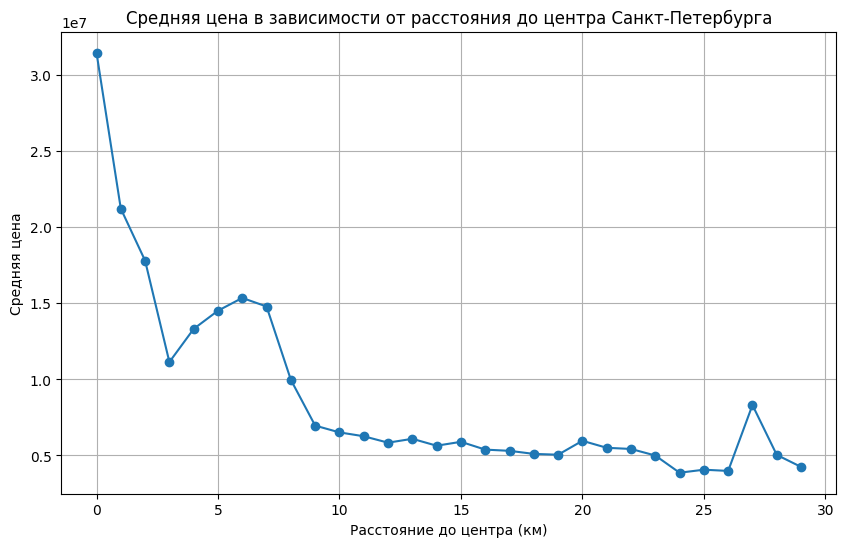

In [50]:
spb_data = data[data['locality_name'] == 'Санкт-Петербург'].copy()

spb_data['cityCenters_nearest_km'] = (spb_data['cityCenters_nearest'] / 1000).round()

mean_price_by_distance = spb_data.groupby('cityCenters_nearest_km')['last_price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_distance.index, mean_price_by_distance.values, marker='o', linestyle='-')
plt.title('Средняя цена в зависимости от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена')
plt.grid(True)
plt.show()

На полученном графике можно заметить, что наиболее дорогие квартиры продаются в самом центре. Далее средняя цена падает до момента, пока расстояние от центра не становится равным приблизительно 3.5 км, после чего отмечается ее рост до момента, пока расстояние от цена не становится равным приблизетельно 7 км. Это может быть связано с тем, что  квартиры, находящиеся в пешей доступности от центра, однако не в самом центре, пользуются спросом на рынке. Наблюдается скачок средней цены на расстоянии примерно 27 км от центра.

### Общий вывод

    На этапе знакомства с файлом была получена общая информация и значениях, содержащихся в таблице. Далее по этим значениям были построены гистограммы, сами значения были обработаны, и полсе этапа обработки их ожидало дальнейшее преобразование в виде проведения с ними математических операций во имя вычисления новых параметров характеристики объявлений недвижимости в Санкт-Петербурге и Ленинградской области. Результаты анализа представлены ниже.

    1) быстрыми продажами можно считать те, которые произошли в первые 45 дней после публикации объявления, исключительно долгими - те, которые заняли более 232 дней; обычно же продажи происходят в первые 92 дня после публикации объявления;
    2) средняя цена в зависимости от общей и жилой площадей, а также площади кухни, прямо пропорционально увеличивается: тем больше площадь, тем выше цена; коэффициенты корреляции в обеих зависимостях близки к 0.5; 
    5) средняя цена в зависимости от количества комнат не имеет зависимости: она пропорционально увеличивается до момента 5 комнат, далее замечен спад средней стоимости и ее резкий скачок на 15 комнатах, после чего снова следует спад; коэффициент корреляции этой зависимости равен 0.36
    6) средняя цена в зависимости от этажа, на котором расположена квартира, показывает, что наиболее дорогие квартиры находятся на последнем этаже, самые дешевые - на первом;
    7) средняя цена в зависимости ото дня публикации объявления примерно одинакова для каждого дня, однако объявления, выложенные в субботу, имеют более высокий ценник относительно объявлений, опубликованных в другие дни;
    8) средняя цена в зависимости от месяца публикации объявления несильно отличается друг от друга, тем не менее можно заметить, что самые высокие цены указаны в объявлениях, опубликованных в декабре, а самые низкие - в октябре;
    9) средняя цена в зависимости от года публикации объявления значительно отлчиается: максимальные цены были зафиксированы в 2014, минимальные - в 2018;
    10) населенный пункт с самой высокой ценой квадратного метра - Санкт-Петербург, где средняя стоимость квадратного метра составляет 115 тысяч рублей, а с самой низкой ценой - Выборг, где средняя стоимость квадратного метра составляет 58 тысяч рублей;
    11) наиболее дорогие квартиры продаются в самом центре; далее средняя цена падает до момента, пока расстояние от центра не становится равным приблизительно 3.5 км, после чего отмечается ее рост до момента, пока расстояние от центра не становится равным приблизительно 7 км. Это может быть связано с тем, что квартиры, находящиеся в пешей доступности от центра, однако не в самом центре, пользуются спросом на рынке. Наблюдается скачок средней цены на расстоянии примерно 27 км от центра.